# Demonstration of Volt-var Function

This example demonstrates steady state and dynamic simulation of volt-var function

In [1]:
from opender import DER, DER_PV
import matplotlib.pyplot as plt

In [2]:
# Create OpenDER object and enable volt-var function with IEEE 1547-2018 Cat B default setting
der_obj = DER_PV()
der_obj.der_file.QV_MODE_ENABLE=True

In [3]:
# If left unchanged, the nameplate rating is 100kW, 100kVA
print(der_obj.der_file.NP_P_MAX, der_obj.der_file.NP_VA_MAX)

100000 100000


In [4]:
# Set voltage to 1pu and available DC power to 1pu
der_obj.update_der_input(v_pu=1, f=60, p_dc_pu = 1)

In [5]:
# Execute DER object to generate ouput. DER should output 1pu active power and 0 reactive power.
der_obj.run()

(100000.0, -0.0)

In [6]:
# print status of der_obj 
print(der_obj)

100000.0: DER1 (Continuous Operation)- v_meas_pu=1.00000, p_desired_pu=1.00, q_desired_pu=0.00, p_out_kw=100.000, q_out_kvar=-0.000


In [7]:
# Set voltage to 1.05pu, DER should absorb 0.22pu of reactive power, and reduce its active power due to reactive power priority.
der_obj.update_der_input(v_pu=1.05)
der_obj.run()

(97549.9871860576, -22000.0)

## Dynamic simulation

In [8]:
# Configure dynamic simulation timestep
t_s = 1
DER.t_s = t_s
t = 0

In [9]:
# Prepare arrays for plotting
t_plot = []
v_plot = []
p_plot = []
pdc_plot = []
q_plot = []

In [10]:
# Simulate for 45s
while t < 45:
    
    # voltage alternating between 1.05 and 1pu
    if 15<t<30:
        der_obj.update_der_input(v_pu=1)
    else:
        der_obj.update_der_input(v_pu=1.05)

    # calculate output power each time step
    P, Q = der_obj.run()

    # save result
    t_plot.append(t)
    p_plot.append(der_obj.p_out_pu)
    pdc_plot.append(der_obj.der_input.p_avl_pu)
    q_plot.append(der_obj.q_out_pu)
    v_plot.append(der_obj.der_input.v_meas_pu)

    # increase t
    t = t + t_s

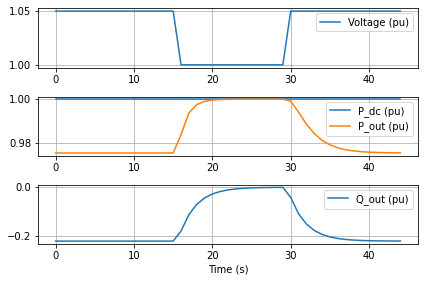

In [11]:
# plot figure
fig = plt.figure()
plt.clf()
ax1=plt.subplot(3, 1, 1)
plt.plot(t_plot, v_plot, label = 'Voltage (pu)')
plt.grid()
plt.legend()
plt.subplot(3, 1, 2, sharex=ax1)
plt.plot(t_plot, pdc_plot, label='P_dc (pu)')
plt.plot(t_plot, p_plot, label='P_out (pu)')
plt.grid()
plt.legend()
plt.subplot(3, 1, 3, sharex=ax1)
plt.plot(t_plot, q_plot, label='Q_out (pu)')
plt.grid()
plt.legend()
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

Notice the reactive power took around 5 seconds to reach 90% of the change due to open loop response time requirements